1. [Adaptive Boosting](#adaptive-boosting)

#### Adaptive Boosting:
- uses SAMME algorithm (Stagewise Additive Modeling using a Multi-class Exponential loss function)
- connecting weak learners in series
- created by forest of stumps 
- consider the dataset with 3 features and 1 binary target variable 
    - consider we have 8 records
- first, we assign equal sample weights to all the records in the dataset
    - considering 8 records, the sample weights would be 1/8 for all the 8 records
- we create stumps for each feature with relevance to target variable i.e. a node with two leaf nodes
- In Adaboost some stumps will have higher say than other stumps unlike random forest were all trees built have equal importance in the decision of prediciton
- In Adaboost the ordering of the stumps are important unlike in Random Forest

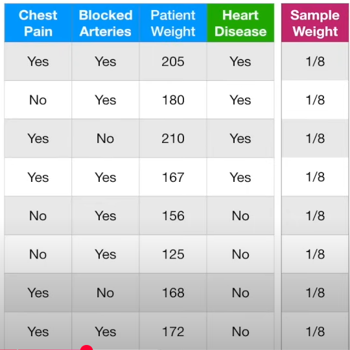

In [6]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/dataset_sample_weight.png')
new_image = img.resize((350, 350))
display(new_image)

- After creating the stumps for each feature, we calculate the gini index/residual sum of squares value for each stump
- For numerical feature, 
    - we use the average of adjacent samples for the entire dataset
    - we then calculate the gini index value for the averages from the first to the last and identify the lowest gini index for that feature
- We choose the stumps with the lowest gini index value to be the root stump
- Now, we calculate the Total Error value based on the misclassified samples w.r.t the root stump 
    - 1/8 (refer the below image)

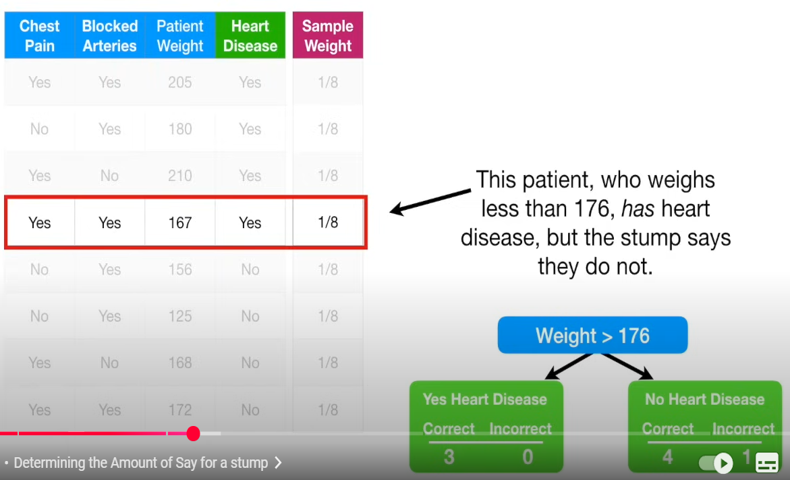

In [12]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/total_error.png')
new_image = img.resize((790, 480))
display(new_image)

- now, we calculate the performance of the stump 
    - Performance = 1/2 * log2 (1-1/8) => 0.97

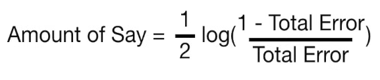

In [19]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/performance.png')
new_image = img.resize((380, 80))
display(new_image)

- the Total Error vs Performance represented in a graph below
    - Total Error = 0, Performance = 3 and more (very good)
    - Total Error = 0.5, Performance = 0 (unable to make any decision)
    - Total Error = 1, Performance = -3 and more (always predict the opposite class)

Note:
- Total Error cannot be 0 or 1 practically, so a small error term is added to the performance formula

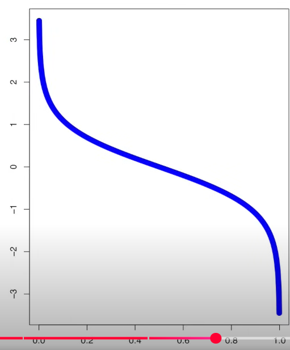

In [18]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/performance_graph.png')
new_image = img.resize((290, 350))
display(new_image)

- now, we update the sample weights associated with the sample to give importance to incorrectly classified records which will be sent to next weak learner (model)
- in terms of updating the weights for incorrect samples

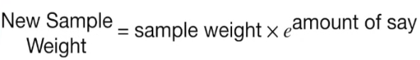

In [21]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/update_weight.png')
new_image = img.resize((420, 60))
display(new_image)

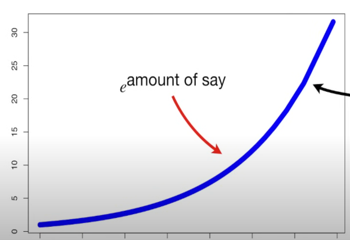

In [23]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/update_weight_incorrect.png')
new_image = img.resize((350, 240))
display(new_image)

- in terms of updating the weights for correct samples

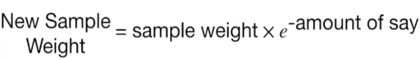

In [25]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/update_weight1.png')
new_image = img.resize((420, 60))
display(new_image)

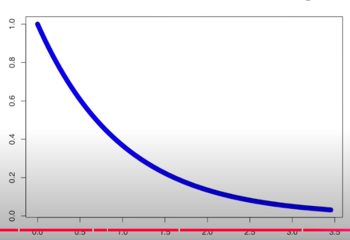

In [26]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/update_weight_correct.png')
new_image = img.resize((350, 240))
display(new_image)

- we substitute the updated values into the new updated weight column

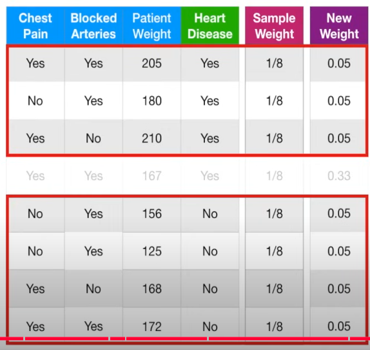

In [29]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/dataset_updated_weight.png')
new_image = img.resize((370, 350))
display(new_image)

- we, normalize the weights i.e. it necessary for the sum of weights for all the records to be equal to 1
    - so we sum all the weights of the records
    - we then divide the weight of each record with the sum of all weights of the records


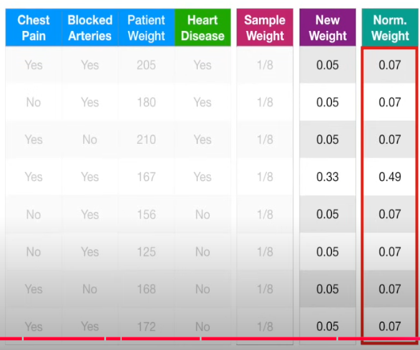

In [32]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/dataset_updated_weight2.png')
new_image = img.resize((420, 350))
display(new_image)

- now, we make the normalized as the new sample weights to make the second stump and again use the weighted gini index value
- the weighted gini index would put more emphasis to correctly classify the misclassified sample

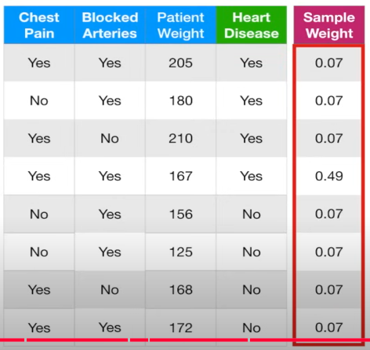

In [33]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/dataset_updated_weight3.png')
new_image = img.resize((370, 350))
display(new_image)

- There is an alternate approach to weighted gini index, i.e. to create a collection of samples that contain the duplicate copies of the samples with the largest sample weights (misclassfied samples)
- in the alternate approach, we bucketize the normalized updated sample weights

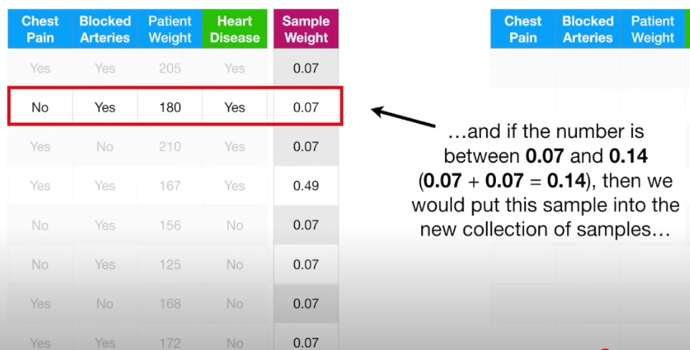

In [38]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/bucketize.png')
new_image = img.resize((690, 350))
display(new_image)

- now, we randomly choose the values between 0 - 1 and fill the new dataset for the second weak learner
    - make sure if the original dataset had 50 records, we also need the new dataset to have 50 records as well which might contain duplicate records because of the emphasis of weights given to misclassified records
- just like the start, we assign normalized sample weights to the records in the new datatset

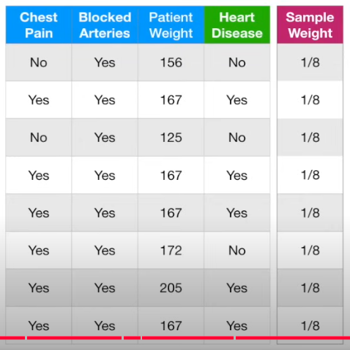

In [39]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/dataset_sample_weight2.png')
new_image = img.resize((350, 350))
display(new_image)

- For classification:
    - now while predicting the output class for a test records
        - consider, we have 6 stumps created 
            - out of which 4 stumps have the performance of YES denoted as 1
                - 0.97 * prediction (1) + 0.32 * prediction (1) + 0.78 * prediction (1) + 0.63 * prediction (1) = 2.7
            - 2 out of 6 stumps have the performance of NO denoted as -1
                - 0.41 * prediction (-1) + 0.82 * prediction (-1) = -1.23
    - based on the highest sum value the output label for the test data is classified

- For regression:   
    - now while predicting the output class for a test records
        - Final Prediction = (weight_regressor_1 * prediction_regressor_1) + (weight_regressor_2 * prediction_regressor_2) + ... + (weight_regressor_n * prediction_regressor_n)
        - performance = weight_regressor

Learning Rate:
- Small Learning Rate:
    - Requires more weak learners (higher n_estimators).
    - Can lead to better generalization and reduced overfitting.
    - Slower convergence.
- Large Learning Rate:
    - Requires fewer weak learners.
    - Can lead to faster convergence.
    - Increases the risk of overfitting.